In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
## Reading data from csv-file and compart into input and output
train = pd.read_csv("train.csv")
X = np.array(train.drop(columns = ["Id", "y"]))
y = np.array(train.get("y"))
#y_train = np.array(y_train)
print(X.shape)

(506, 13)


Text(0.5,1,'scatter plot')

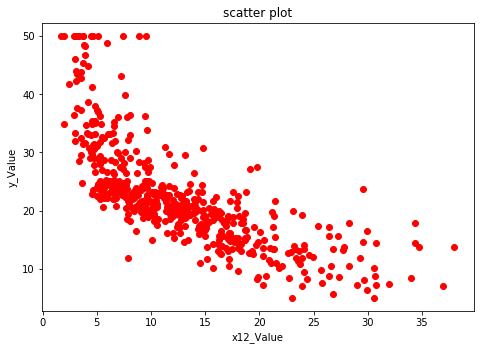

In [3]:
a = 12
fig, ax =plt.subplots(X.shape[1],3)
ax=fig.add_axes([0,0,1,1])
ax.scatter(X[:,a], y , color='r')
ax.set_xlabel(f'x{a}_Value')
ax.set_ylabel('y_Value')
ax.set_title('scatter plot')

In [4]:
## data preprocessing
scaler = StandardScaler()
X = X[:,(a-1):a]
scaler.fit(X)
#print(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
## k-fold

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=True)

#for train_index, test_index in cv.split(x):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)


In [6]:
#Ridge Regression
cv = KFold(n_splits=10)
cv.get_n_splits(X)
alphas = np.array([0.01, 0.1 , 1 , 10 , 100])
RMSE_avg = []

for alph in alphas:
    RMSE = []
    clf = Ridge(alpha= alph, normalize= True, solver = 'auto')
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        RMSE.append(sk.metrics.mean_squared_error(y_test, y_pred))
    
    RMSE_avg.append(np.mean(RMSE))
    print(np.mean(RMSE), '\n', alph, '\n', RMSE)

75.46295472003244 
 0.01 
 [84.38476902503767, 70.2053267213998, 66.43385110588261, 69.53228549913804, 38.927306889518945, 65.41330121158016, 79.8109224622278, 94.83013936719603, 126.27258720477818, 58.8190577135652]
75.52727475818847 
 0.1 
 [83.61737151248595, 69.84322046133501, 67.30287301470895, 69.86289687257084, 38.855126643208834, 65.51953028067524, 80.20738644018009, 94.8472940708984, 126.56085071423298, 58.65619757158839]
77.74853592967169 
 1.0 
 [82.51764984488993, 70.27148551064226, 73.99128127201531, 73.51078403867031, 41.76897165471437, 67.23584193529105, 83.03998499427743, 95.52185983400264, 130.5051334287985, 59.122366783415075]
83.13576309881317 
 10.0 
 [86.05163417481144, 74.46747069095922, 84.51910456057915, 80.4612872833919, 50.15577337353456, 70.92182863824151, 87.25896374687512, 97.1779361004145, 138.60385831152433, 61.73977410779997]
84.57807441523629 
 100.0 
 [87.30106389772463, 75.74527006580111, 87.0592374133113, 82.22936708041868, 52.46570544763195, 71.8853

In [7]:
print(X_train.shape,X_test.shape, '\n', y_train.shape,y_test.shape)

(456, 1) (50, 1) 
 (456,) (50,)


In [8]:
print(sk.metrics.mean_squared_error(y_test, y_pred))

62.513243464868175


In [9]:
print(RMSE)

[87.30106389772463, 75.74527006580111, 87.0592374133113, 82.22936708041868, 52.46570544763195, 71.88536162014964, 88.25885171084265, 97.62229466988362, 140.70034878173118, 62.513243464868175]


In [10]:
print(RMSE_avg)

[75.46295472003244, 75.52727475818847, 77.74853592967169, 83.13576309881317, 84.57807441523629]


In [11]:
result = pd.concat([pd.DataFrame(RMSE_avg)])
print(result)
pd.DataFrame(result).to_csv("submit.csv", index=False, header=False, decimal='.', sep=' ', float_format='%.1f')

           0
0  75.462955
1  75.527275
2  77.748536
3  83.135763
4  84.578074


In [12]:
print(max(RMSE_avg))

84.57807441523629
